# Description:                                                                                                                   
The objective of the dataset is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. The datasets consists of several medical predictor variables and one target variable called 'Diabetes'. Predictor variables includes the patient's gender,hypertension,heart_disease,smoking history,their BMI,HbA1c_level,Blood_Glucose_level, age, and so on.


# Step 0: Import libraries and Dataset

In [35]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [36]:
# Importing dataset
#csv_file_path = 'diabetes.csv'
dataset = pd.read_csv('updated_diabetes.csv')

# Step 1: Descriptive Statistics

In [37]:
# Preview data
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,0.0,25.19,6.6,140,0
1,0.0,54.0,0,0,1.0,27.32,6.6,80,0
2,1.0,28.0,0,0,0.0,27.32,5.7,158,0
3,0.0,36.0,0,0,3.0,23.45,5.0,155,0
4,1.0,76.0,1,1,3.0,20.14,4.8,155,0


In [38]:
# Dataset dimensions - (rows, columns)
dataset.shape

(100000, 9)

In [39]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               99982 non-null   float64
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      89549 non-null   float64
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 6.9 MB


In [40]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,99982.0,0.414375,0.492616,0.00,0.00,0.00,1.00,1.00
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
smoking_history,89549.0,0.919921,0.951173,0.00,0.00,1.00,1.00,3.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [41]:
# Count of null values
dataset.isnull().sum()

gender                    18
age                        0
hypertension               0
heart_disease              0
smoking_history        10451
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
dtype: int64

# Step 2: Data Visualization

<AxesSubplot:xlabel='diabetes', ylabel='count'>

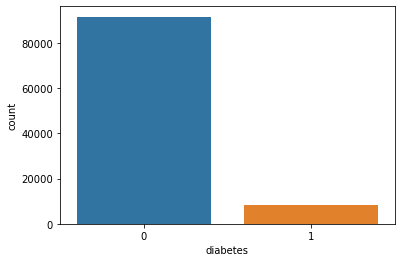

In [42]:
# Outcome countplot
sns.countplot(x = 'diabetes',data = dataset)

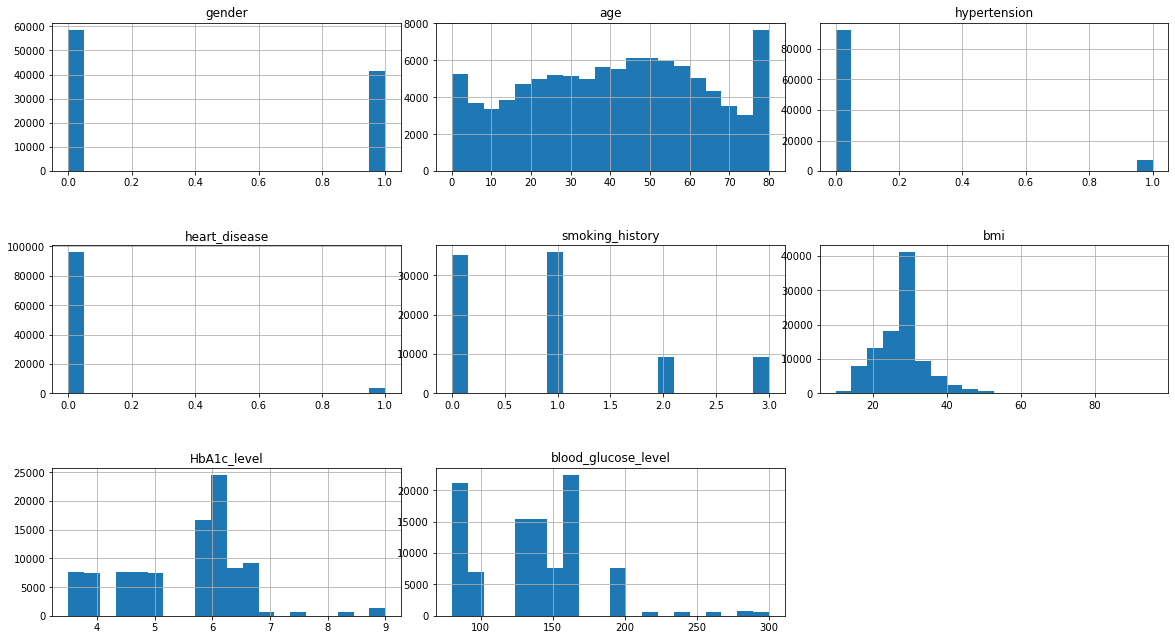

In [44]:
# Histogram of each feature
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

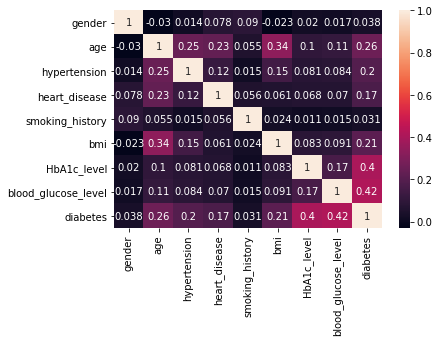

In [45]:
# Heatmap
sns.heatmap(dataset.corr(), annot = True)
plt.show()

# Step 3: Data Preprocessing

In [11]:
dataset_new = dataset

In [12]:
# Replacing zero values with NaN
dataset_new[["gender","age", "hypertension", "heart_disease","smoking_history", "bmi", "HbA1c_level", "blood_glucose_level"]] = dataset_new[["gender", "age", "hypertension", "heart_disease","smoking_history", "bmi", "HbA1c_level", "blood_glucose_level"]].replace(0, np.NaN) 

In [13]:
# Count of NaN
dataset_new.isnull().sum()

gender                 58570
age                        0
hypertension           92515
heart_disease          96058
smoking_history        45546
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
dtype: int64

In [14]:
# Replacing NaN with mean values
dataset_new["gender"].fillna(dataset_new["gender"].mean(), inplace = True)
dataset_new["age"].fillna(dataset_new["age"].mean(), inplace = True)
dataset_new["hypertension"].fillna(dataset_new["hypertension"].mean(), inplace = True)
dataset_new["heart_disease"].fillna(dataset_new["heart_disease"].mean(), inplace = True)
dataset_new["smoking_history"].fillna(dataset_new["smoking_history"].mean(), inplace = True)
dataset_new["bmi"].fillna(dataset_new["bmi"].mean(), inplace = True)
dataset_new["HbA1c_level"].fillna(dataset_new["HbA1c_level"].mean(), inplace = True)
dataset_new["blood_glucose_level"].fillna(dataset_new["blood_glucose_level"].mean(), inplace = True)

In [15]:
# Statistical summary
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,100000.0,1.000000,0.000000,1.00,1.00,1.0000,1.0000,1.00
age,100000.0,41.885856,22.516840,0.08,24.00,43.0000,60.0000,80.00
hypertension,100000.0,1.000000,0.000000,1.00,1.00,1.0000,1.0000,1.00
heart_disease,100000.0,1.000000,0.000000,1.00,1.00,1.0000,1.0000,1.00
smoking_history,100000.0,1.512800,0.567247,1.00,1.00,1.5128,1.5128,3.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.3200,29.5800,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.8000,6.2000,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.0000,159.0000,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.0000,0.0000,1.00


# Step 4: Train test split

In [16]:
X = dataset.drop('diabetes',axis=1)
Y = dataset['diabetes']

In [17]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['diabetes'] )

In [18]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (80000, 8)
X_test shape: (20000, 8)
Y_train shape: (80000,)
Y_test shape: (20000,)


# Step 5: Data Modelling

In [19]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

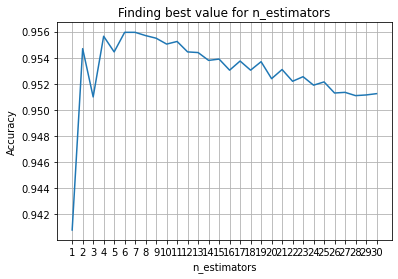

Highest value:  0.95595


In [20]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [21]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [22]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [23]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [24]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [25]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [26]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

# Step 6: Model Evaluation

In [27]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [28]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 95.99
K Nearest neighbors: 95.19
Support Vector Classifier: 96.045
Naive Bayes: 95.675
Decision tree: 95.28999999999999
Random Forest: 96.74000000000001


# From the above comparison, we can observe that Random Forest gives the highest accuracy of 96.74%

In [29]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[18279,    21],
       [  941,   759]])

<AxesSubplot:>

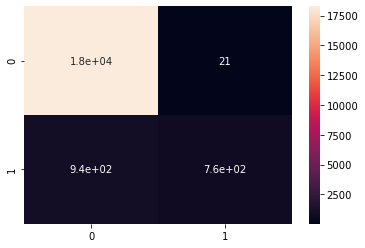

In [30]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [31]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18300
           1       0.97      0.45      0.61      1700

    accuracy                           0.95     20000
   macro avg       0.96      0.72      0.79     20000
weighted avg       0.95      0.95      0.94     20000

